
A Telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It's a classification problem i.e. given the dataset, with predefined labels, its required to build a model to be used to predict class of a new or unknown case using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

The objective is to build a classifier, to predict the class of unknown cases

In [ ]:
import pandas as pd
import numpy as np

In [37]:
df= pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [15]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [38]:
df.isnull().sum() # no null values are seen

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [41]:
X=df.drop("custcat",axis=1)


In [42]:
Y= df["custcat"]
Y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_norm= sc.fit_transform(X)
X_norm
col=list(X.columns)

In [46]:
X_norm= pd.DataFrame(data=X_norm,columns=col)
X_norm.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=48)


In [55]:
xtrain.shape

(700, 11)

In [56]:
ytrain.shape

(700,)

In [95]:
#Training
k=4
model=KNeighborsClassifier(n_neighbors=k)
model.fit(xtrain,ytrain)
yhat1=model.predict(xtest)

In [96]:
from sklearn.metrics import accuracy_score
acc1= accuracy_score(ytest,yhat)
acc1

0.33

In [99]:
#Training
k=6
model6=KNeighborsClassifier(n_neighbors=k)
model6.fit(xtrain,ytrain)
yhat6=model6.predict(xtest)

In [100]:
from sklearn.metrics import accuracy_score
acc2= accuracy_score(ytest,yhat6)
acc2

0.33

In [101]:
#Training
k=9
model9=KNeighborsClassifier(n_neighbors=k)
model9.fit(xtrain,ytrain)
yhat9=model9.predict(xtest)

In [102]:
from sklearn.metrics import accuracy_score
acc3= accuracy_score(ytest,yhat9)
acc3

0.3433333333333333

In [113]:
Ks=12
mean_acc = np.zeros(Ks-1)
std_acc=np.zeros(Ks-1)
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
for i in range(1,Ks):
    #Train model and predict
    mod=KNeighborsClassifier(n_neighbors=i)
    mod.fit(xtrain,ytrain)
    yhat=mod.predict(xtest)
    mean_acc[i-1]=accuracy_score(ytest,yhat)
    std_acc[i-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28666667, 0.30666667, 0.27333333, 0.32333333, 0.32666667,
       0.33      , 0.31      , 0.33666667, 0.34333333, 0.32      ,
       0.33      ])

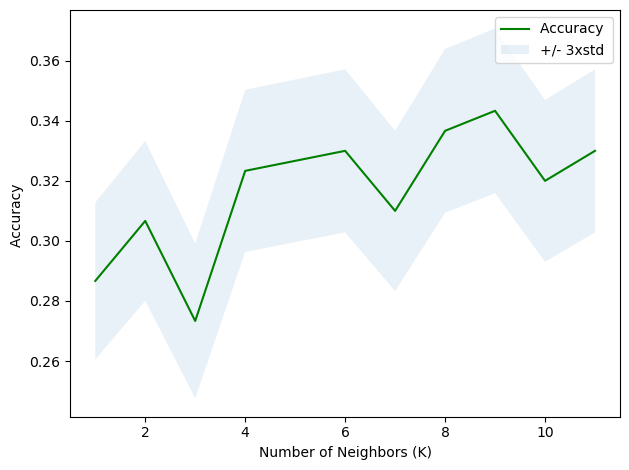

In [116]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [76]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
mod=KNeighborsClassifier(n_jobs=-1)
param={'n_neighbors':[3,5,7,9,11], 'weights':['uniform','distance'],
       'algorithm':['auto', 'ball_tree','kd_tree','brute']}


In [69]:
hyp_mod=GridSearchCV(mod,param_grid=param)
hyp_mod.fit(xtrain,ytrain)
print("Best Hyper Parameters:\n",hyp_mod.best_params_)
ypred=hyp_mod.predict(xtest)


D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminCla

D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminCla

D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminCla

D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminCla

D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "D:\AnacondaInstallation\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminCla

Best Hyper Parameters:
 {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'distance'}


D:\AnacondaInstallation\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.29285714 0.29857143 0.30285714 0.27714286 0.29857143 0.29428571
 0.30571429 0.29285714 0.30285714 0.30571429 0.29285714 0.30142857
 0.30285714 0.27714286 0.29857143 0.29428571 0.30285714 0.29285714
 0.30142857 0.30428571 0.29285714 0.29857143 0.30285714 0.27714286
 0.29857143 0.29428571 0.30571429 0.29285714 0.30285714 0.30571429
        nan 0.3               nan 0.27714286        nan 0.29285714
        nan 0.29285714        nan 0.30714286]
  warnings.warn(
